In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from mlxtend.plotting import plot_confusion_matrix




df = pd.read_csv('/content/drive/MyDrive/TE/Temp/Dsdba/Social_Network_Ads.csv')
df.head(1000)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [57]:
df.shape

(400, 5)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [59]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [60]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

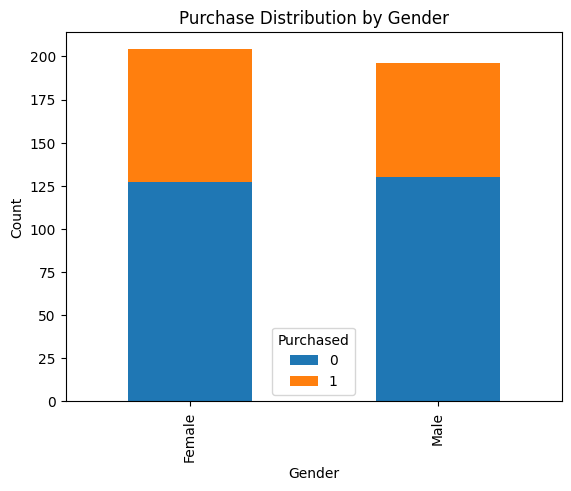

In [61]:
purchase_by_gender = df.groupby(['Gender', 'Purchased']).size().unstack()
purchase_by_gender.plot(kind='bar', stacked=True)
plt.title('Purchase Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

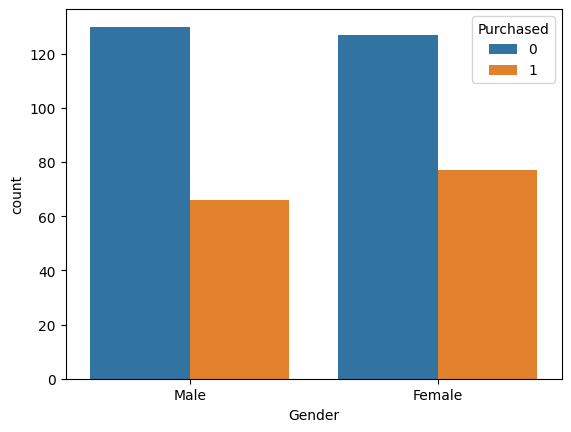

In [62]:
sns.countplot(x='Gender', hue='Purchased', data=df)

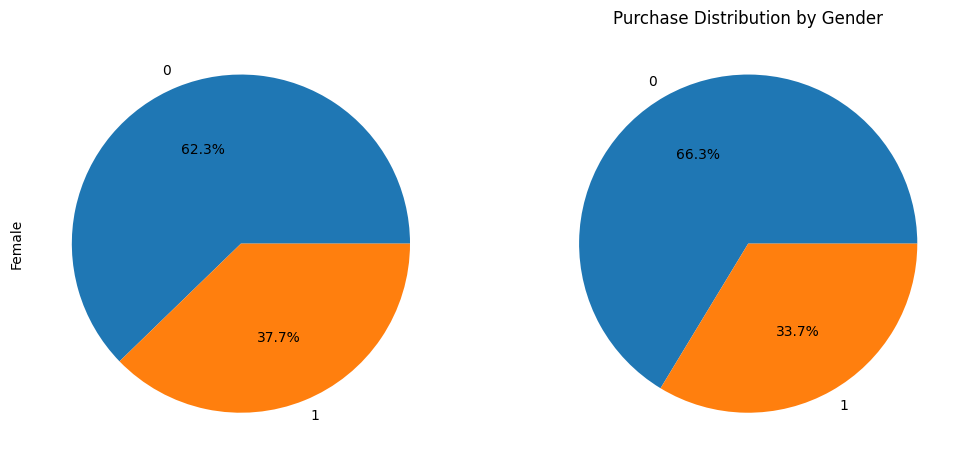

In [63]:
purchase_counts = df.groupby(['Purchased', 'Gender']).size().unstack()
purchase_counts.plot(kind='pie', subplots=True, figsize=(12, 6), autopct='%1.1f%%', legend=False)
plt.title('Purchase Distribution by Gender')
plt.ylabel('')
plt.show()

<Axes: xlabel='Age', ylabel='count'>

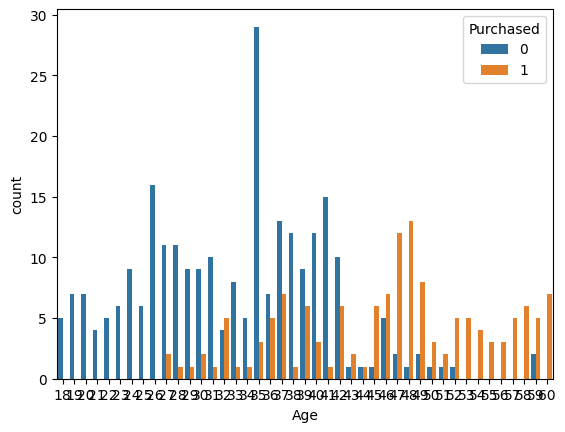

In [64]:
sns.countplot(x='Age', hue='Purchased', data=df)

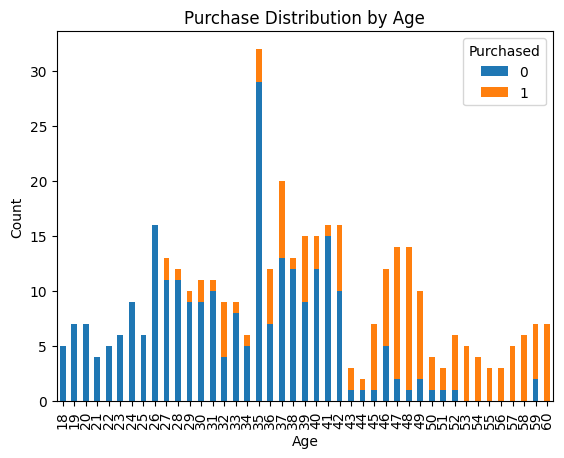

In [65]:
purchase_by_gender = df.groupby(['Age', 'Purchased']).size().unstack()
purchase_by_gender.plot(kind='bar', stacked=True)
plt.title('Purchase Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

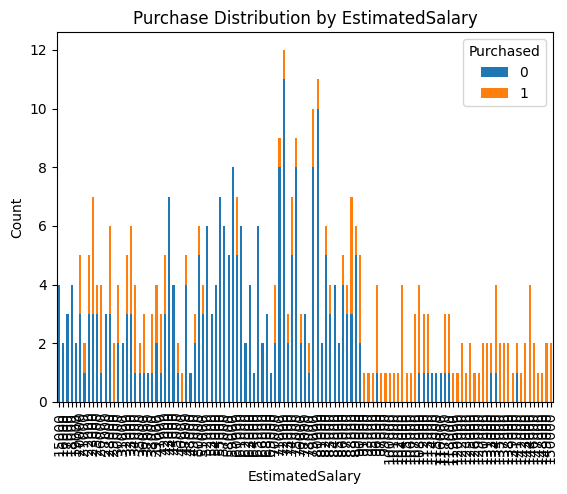

In [66]:
purchase_by_gender = df.groupby(['EstimatedSalary', 'Purchased']).size().unstack()
purchase_by_gender.plot(kind='bar', stacked=True)
plt.title('Purchase Distribution by EstimatedSalary')
plt.xlabel('EstimatedSalary')
plt.ylabel('Count')
plt.show()

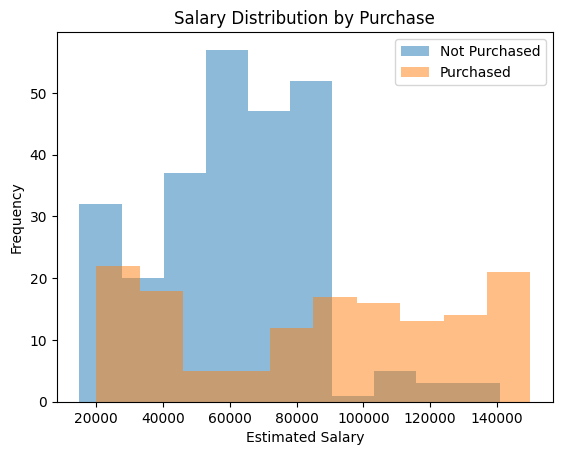

In [67]:
plt.hist(df[df['Purchased'] == 0]['EstimatedSalary'], alpha=0.5, label='Not Purchased')
plt.hist(df[df['Purchased'] == 1]['EstimatedSalary'], alpha=0.5, label='Purchased')
plt.title('Salary Distribution by Purchase')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.legend()
plt.show()

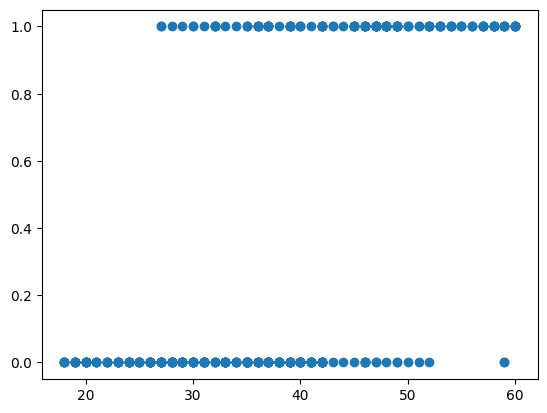

In [68]:
plt.scatter(df['Age'],df['Purchased'])

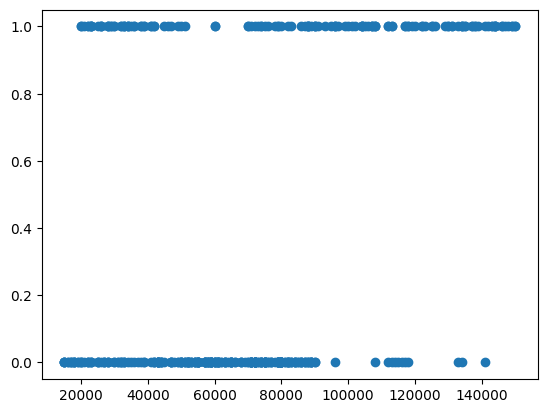

In [69]:
plt.scatter(df['EstimatedSalary'],df['Purchased'])

In [70]:
df["Gender"].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [71]:
def gender_encoder(value):
    if (value == "Male"):
        return 1
    elif (value == "Female"):
        return 0
    else:
        return value

df["Gender"] = df["Gender"].map(gender_encoder)
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [72]:
df["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

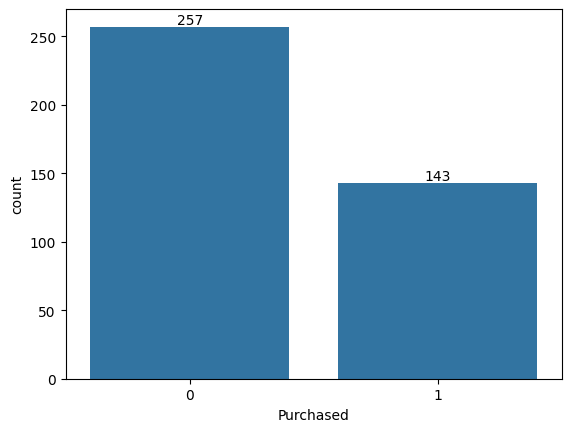

In [73]:
countplot = sns.countplot(x="Purchased",data=df)
for i in countplot.containers:
    countplot.bar_label(i,)
plt.show()

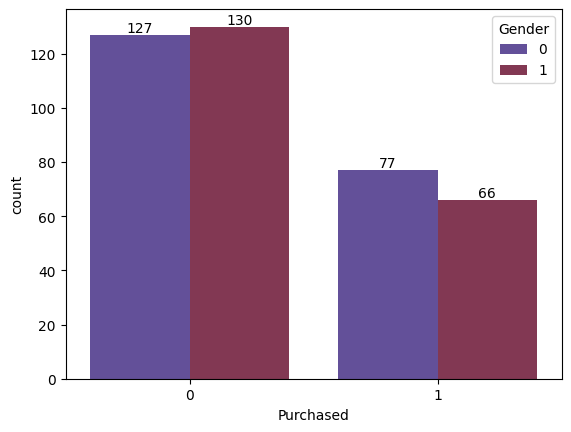

In [74]:
countplot = sns.countplot(x="Purchased",data=df, hue=df["Gender"], palette="twilight")
for i in countplot.containers:
    countplot.bar_label(i,)
plt.show()

In [75]:
x = df[["Age", "EstimatedSalary","Gender"]]
y = df["Purchased"]
print(x)
print(y)

     Age  EstimatedSalary  Gender
0     19            19000       1
1     35            20000       1
2     26            43000       0
3     27            57000       0
4     19            76000       1
..   ...              ...     ...
395   46            41000       0
396   51            23000       1
397   50            20000       0
398   36            33000       1
399   49            36000       0

[400 rows x 3 columns]
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [76]:
# scaler = StandardScaler()
# x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((200, 3), (200, 3), (200,), (200,))

[[125   0]
 [ 75   0]]


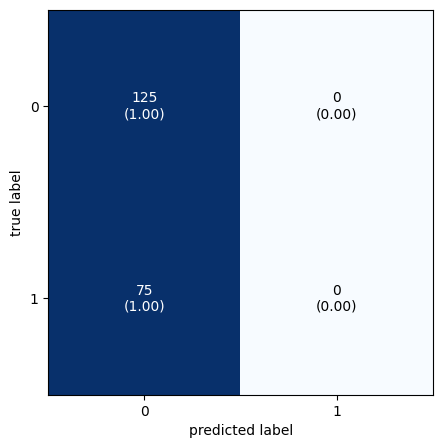

NameError: name 'confusion_matrix_display' is not defined

In [87]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

plot_confusion_matrix(conf_mat=cm, figsize=(5,5), show_normed=True)
plt.show()
confusion_matrix_display(mat=cm)




In [78]:
score =accuracy_score(y_test,y_pred)
print(score)

0.625


In [79]:
print(f1_score(y_test,y_pred))

0.0


In [80]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       125
           1       0.00      0.00      0.00        75

    accuracy                           0.62       200
   macro avg       0.31      0.50      0.38       200
weighted avg       0.39      0.62      0.48       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]

In [82]:
# Accuracy=
# Total Number of Predictions
# Number of Correct Predictions

print((TP+TN)/(TP+TN+FN+FP))


0.625


In [83]:
# Precision=
# True Positives+False Positives / True Positives
# high precision score indicates that the model has a low false positive rate,
#  precison
print(TP/(TP+FP))
print(TN/(TN+FN))


nan
0.625


<ipython-input-83-9eb6088a2814>:5: RuntimeWarning: invalid value encountered in scalar divide
  print(TP/(TP+FP))


In [84]:
# Accuracy measures the overall correctness of the predictions made by the model across all classes.
# Precision measures the proportion of correctly predicted positive instances out of all instances predicted as positive by the model.

https://github.com/atharvabhide/SPPU-COMP-2019-PRACTICALS/blob/main/DSBDA/lab%2005/atharva_bhide_assignment_5.ipynb